In [1]:
# 12th

import skimage
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

digits = load_digits()

In [3]:
digits.data.shape

(1797, 64)

In [5]:
# number of image to work with since dict learnin takes time
NUM_IMAGES = 38

sample = digits.data[:NUM_IMAGES, :]

In [7]:
sample.shape # mean 38 images of 8 x 8 size

(38, 64)

In [11]:
from sklearn.decomposition import DictionaryLearning

# dictionary learning, reduce component from 64 to 35 and it takes time to run
dict_learn = DictionaryLearning(n_components = 36, 
                                fit_algorithm="lars",  # algo to get sparse rep of image
                               transform_algorithm="lasso_lars") # algo to use this sparse rep to transform or denoise other image

X_dict = dict_learn.fit_transform(sample)

In [12]:
X_dict.shape

(38, 36)

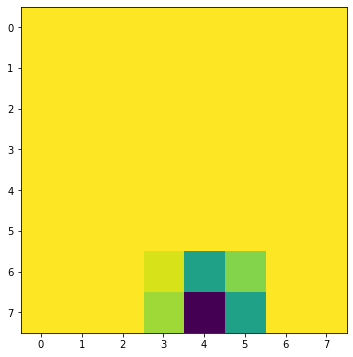

In [14]:
# resize X-dict image for plotting in matplot
from skimage import transform

resized = transform.resize(X_dict[0].reshape(6, 6), (8,8))

plt.figure(figsize = (6, 6))
plt.imshow(resized)

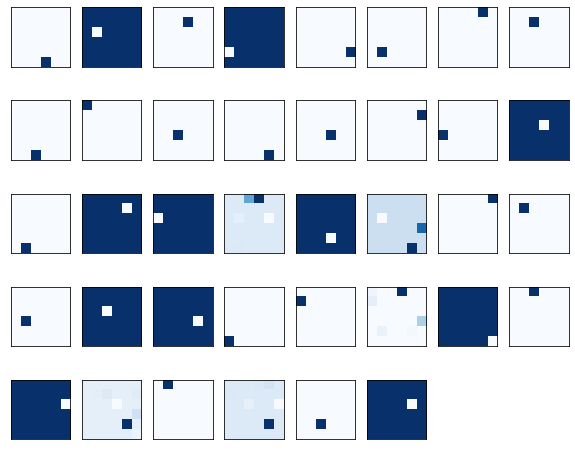

In [15]:
# sparse coding for all sample images
fig = plt.figure(figsize = (10, 10))

for i in range(NUM_IMAGES):
    ax = fig.add_subplot(6, 8, i+1, xticks = [], yticks = [])
    ax.imshow(X_dict[i].reshape(6, 6), cmap = "Blues_r", interpolation = "nearest")

In [16]:
# get the original image back(sparse rep x dict atoms extracted)
import numpy as np

original = np.matmul(X_dict, dict_learn.components_)

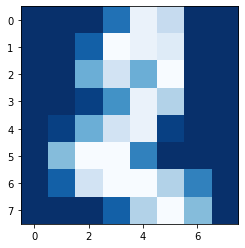

In [18]:
plt.imshow(original[2].reshape(8, 8), cmap = "Blues_r")